In [1]:
import os
os.environ["WANDB_NOTEBOOK_NAME"] = "DA24S018_Assignment1.ipynb"

In [2]:
import numpy as np
import wandb
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

### Loading the Fashion_Mnist data

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
print("No of Training Samples: ", x_train.shape[0])
print("No of Testing Samples: ", x_test.shape[0])
print("Shape of the images in Fashion_Mnist Dataset: ", x_train.shape[1:])
print("No of Unique Labels of Fashion_Mnist: ", np.unique(y_test))

No of Training Samples:  60000
No of Testing Samples:  10000
Shape of the images in Fashion_Mnist Dataset:  (28, 28)
No of Unique Labels of Fashion_Mnist:  [0 1 2 3 4 5 6 7 8 9]


In [5]:
# Creating a mapping from labels to label names
label_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
d = {}
for i in range(10):
    d[i] = label_names[i]

print("Mapping of label to Label/ Class Names: ")
d

Mapping of label to Label/ Class Names: 


{0: 'T-shirt/Top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [6]:
# To get index of one sample from each class
index = []
for i in range(10): 
    index.append((i, list(y_train).index(i))) # (class label, sample index)
print(index) 

[(0, 1), (1, 16), (2, 5), (3, 3), (4, 19), (5, 8), (6, 18), (7, 6), (8, 23), (9, 0)]


In [7]:
images = []
labels = []
for class_label, sample_index in index:
    images.append(x_train[sample_index])
    labels.append(d[class_label])
    

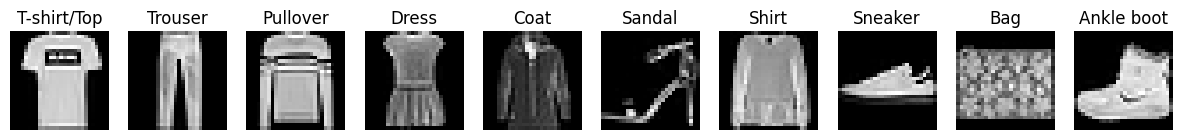

In [8]:
# To verify the sample images
fig, axes = plt.subplots(1, 10, figsize=(15, 3))

for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap="gray") 
    ax.set_title(labels[i])  
    ax.axis("off") 

plt.show()

In [19]:
# To log sample images in wandb.ai
wandb.init(project="Assignment1_BackPropogation", 
           entity="manoj_da24s018-iit-madras", 
           name="Logging_Fashion_MNIST_sample_images")

In [20]:
w_images = []
for img, label in zip(images, labels): 
    w_images.append(wandb.Image(img, caption=f"{label}"))
wandb.log({"Fashion_MNIST_Samples":  w_images})
wandb.finish()